# Auto Accidents(1975-2017)

## Import cuxfilter

In [ ]:
import cuxfilter
from cuxfilter import charts
from cuxfilter.layouts import feature_and_base

In [ ]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [ ]:
from cuxfilter.sampledata import datasets_check
datasets_check('auto_accidents', base_dir=DATA_DIR)

In [ ]:
cux_df = cuxfilter.DataFrame.from_arrow('./data/auto_accidents.arrow')
cux_df.data['ST_CASE'] = cux_df.data['ST_CASE'].astype('float64')

## Define Charts

In [ ]:
# add mappings for day of week
label_map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday',
    9: 'Unknown'
}

gtc_demo_red_blue_palette = [ "#3182bd", "#6baed6", "#7b8ed8", "#e26798", "#ff0068" , "#323232" ]

Uncomment the below lines and replace MAPBOX_TOKEN with mapbox token string if you want to use mapbox map-tiles. Can be created for free here -https://www.mapbox.com/help/define-access-token/

In [ ]:
#from cuxfilter.assets.custom_tiles import get_provider, Vendors
#tile_provider = get_provider(Vendors.MAPBOX_LIGHT, access_token=MAPBOX_TOKEN)

In [ ]:
chart1 = charts.scatter(x='dropoff_x', y='dropoff_y', aggregate_col='DAY_WEEK', aggregate_fn='mean',
                                        tile_provider="CartoLight",
                                         color_palette=gtc_demo_red_blue_palette,pixel_shade_type='linear', unselected_alpha=0.2)

chart2 = charts.bar('YEAR')

chart3 = charts.multi_select('DAY_WEEK', label_map=label_map)

## Create a dashboard object

In [ ]:
d = cux_df.dashboard([chart1, chart2], sidebar=[chart3], layout=cuxfilter.layouts.feature_and_base,theme = cuxfilter.themes.light, title='Auto Accident Dataset')

In [ ]:
#run dashboard inline within the notebook cell
d.app))

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app() inline within the notebook cell

Incase you need to stop the server:

- d.stop()

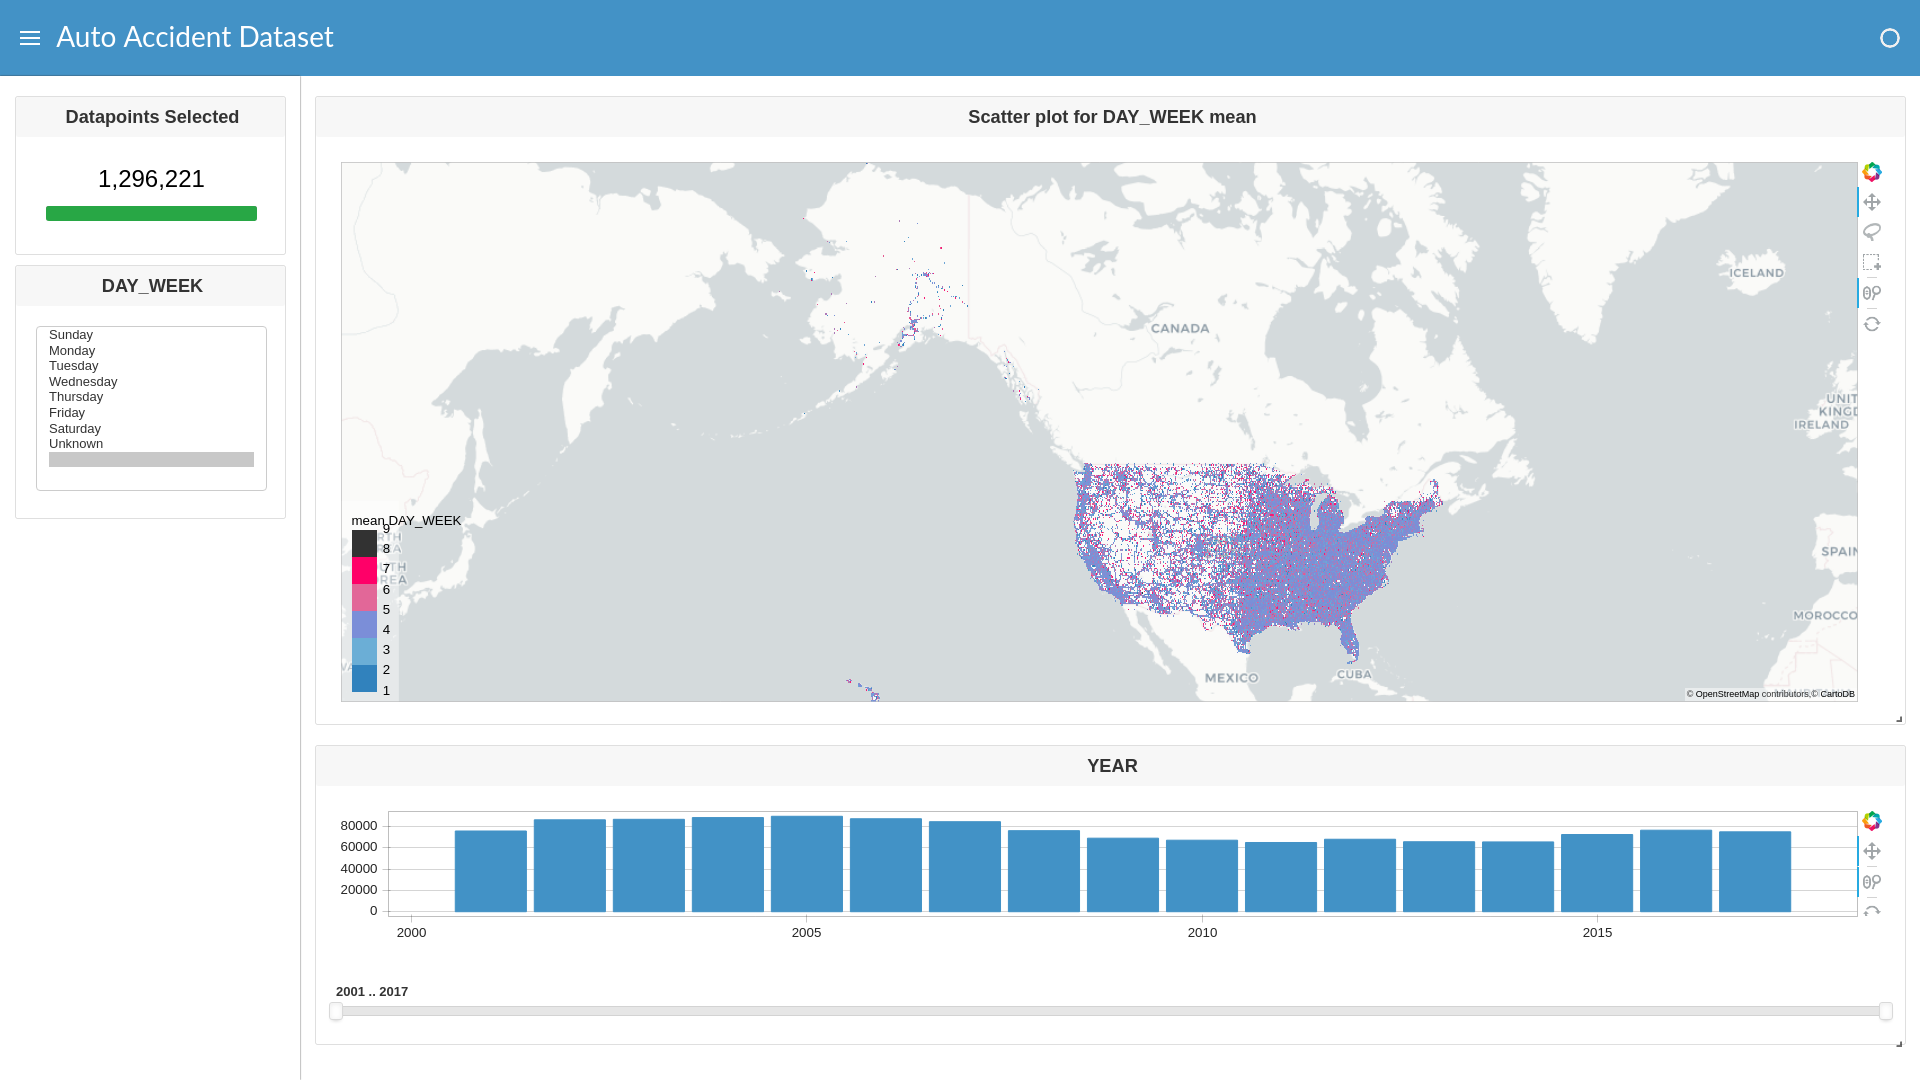

In [30]:
await d.preview()

## Export the queried data into a dataframe

In [ ]:
queried_df = d.export()